# NEISS, Part 1 (Mostly cleaning, from last class)

* **Dataset:** `neiss2017.tsv` - NEISS, again! But an old one, because the newer one is too nice.
* **Source:** https://www.cpsc.gov/Research--Statistics/NEISS-Injury-Data
* **Topics:**
    - `.dropna(subset=...)` to remove rows with missing data
    - `.replace` for exact value replacements
    - `.str.replace` to replace partial strings
    - `np.nan` to replace data with `NaN`
    - different `read_csv` options
    - `normalize` and `dropna` in `value_counts()`
    - inexact matching with `.str.contains`

## Import what we need

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

In [3]:
#gak bisa cuma nulis"Nan"
#"tapi harus diganti dengan np.nan"
np.nan

nan

#string.contains(", NY").unique() #unique untuk menghilangkan duplicate

In [5]:
# Drop to the command line, and say
# show me the first 3 rows of this file
!head -n 3 neiss2017.tsv

# Read in our file, inspect our data

* Check out the first few lines, the last few lines
* See how many rows and columns it is
* Check data types to be sure they are what you think they are

In [6]:
# \t means 'the tab character'
# \n means 'a new line'
#
# sep=        means "this is what separated our stuff"
# encoding=   says "this is the encoding I want to use"
#             since unicode/utf-8 doesn't work, we'll try latin-1
# na_values=  tells you what counts as missing data
#

df = pd.read_csv("neiss2017.tsv", sep='\t', encoding='latin-1', na_values=[0, "UNKNOWN"])
df.head(2)

/Users/dronejournalismlab/.pyenv/versions/3.6.5/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21,1.0,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,1207.0,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71,1.0,1.0,NaN,31.0,53.0,NaN,1.0,5.0,NaN,1807.0,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641


How many rows (and columns) do we have?

In [7]:
df.shape

(386907, 19)

What do the last few rows look like?

In [8]:
df.tail(2)

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
386905,180309765,12/31/2017,202,1.0,1.0,NaN,75.0,57.0,NaN,4.0,1.0,NaN,1842.0,NaN,2MO M DAD FELL ON STAIRS WHILE HOLDING BABY;DX...,NaN,C,20.0,4.757
386906,180309766,12/31/2017,2,2.0,1.0,NaN,85.0,68.0,NaN,4.0,1.0,NaN,1931.0,NaN,2YR F GOT INTO DAD'S ***;DX ACCIDENTAL DRUG IN...,NaN,C,20.0,4.757


What do our columns look like?

In [9]:
df.dtypes

CPSC_Case_Number     object
Treatment_Date       object
Age                  object
Sex                 float64
Race                float64
Other_Race           object
Body_Part           float64
Diagnosis           float64
Other_Diagnosis      object
Disposition         float64
Location            float64
Fire_Involvement    float64
Product_1           float64
Product_2           float64
Narrative_1          object
Narrative_2          object
Stratum              object
PSU                 float64
Weight              float64
dtype: object

## Remove dirty data

Last time we discovered the row where Treatment Date is missing is bad, so let's remove it

In [23]:
df = df.dropna(subset=['Treatment_Date']) #bisa pakai subset hanya untuk milih specific column

## Take a look at the `Sex` column

We read in the PDF about what the different values for `Sex` should be instead of numbers, so let's replace them

In [24]:
df.Sex.value_counts()

Male      208695
Female    178203
Name: Sex, dtype: int64

In [25]:
df['Sex'] = df.Sex.replace({
    1: 'Male',
    2: 'Female',
    0: 'Not recorded'
})

In [26]:
df.Sex.value_counts()

Male      208695
Female    178203
Name: Sex, dtype: int64

## Dealing with Age

In [27]:
#int('5')
# PERMANENTLY change the Age into an integer
df['Age'] = df.Age.astype(float)


#gak bisa pakai integer dalam missing data mesti pakai float krn numpy gak bisa baca

In [28]:
# Remove anyone older than 200 by only selecting ones with age under 200
# The .copy() stops the 'setting values on a slice'
# warning that some people were getting
df = df[df.Age < 200].copy()

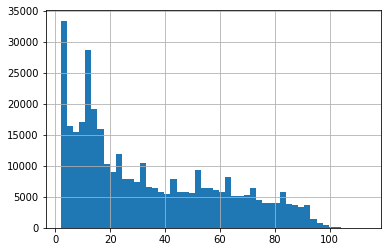

In [29]:
df.Age.hist(bins=50)

In [30]:
df.groupby('Sex').Age.median()

Sex
Female    32.0
Male      21.0
Name: Age, dtype: float64

Sex
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

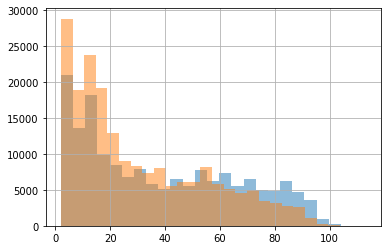

In [45]:
df.groupby('Sex').Age.hist(alpha=0.5, bins=25)

## Decoding the race column

In [46]:
# Make sure you do df['Race'] = to update the column with the replacements
df['Race'] = df.Race.replace({
    1: 'White',
    2: 'Black',
    4: 'Asian',
    5: 'American Indian',
    6: 'Pacific Islander',
    3: 'Other',
    0: 'Not Stated'
})

In [47]:
df.head(2)

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21.0,Male,White,NaN,75.0,62.0,NaN,1.0,1.0,NaN,1207.0,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71.0,Male,White,NaN,31.0,53.0,NaN,1.0,5.0,NaN,1807.0,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641


# Bar chart of the number of times each race shows up in our dataset

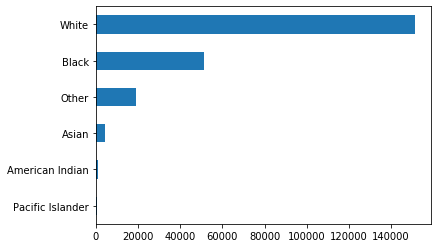

In [48]:
df.Race.value_counts().sort_values().plot(kind='barh')

In [49]:
df.Race.value_counts(normalize=True)

White               0.666106
Black               0.225171
Other               0.083243
Asian               0.018597
American Indian     0.005174
Pacific Islander    0.001709
Name: Race, dtype: float64

## `normalize` when doing `value_counts()`

In [52]:
df.Sex.value_counts()

Male      196165
Female    167898
Name: Sex, dtype: int64

In [31]:
df.Sex.value_counts(normalize=True, dropna=False)
#dropna=False kalau mau cek missing data

Male      0.538814
Female    0.461172
NaN       0.000014
Name: Sex, dtype: float64

## `dropna` when doing `value_counts()`

In [54]:
df.Sex.value_counts()

Male      196165
Female    167898
Name: Sex, dtype: int64

In [55]:
df.Sex.value_counts(dropna=False)

Male      196165
Female    167898
NaN            5
Name: Sex, dtype: int64

# String manipulation

## `Other_Race` column

In [56]:
df.Other_Race.value_counts().head(10)

HISPANIC        15728
MULTI-RACIAL     2004
HISP              760
SOMALI            361
NS                300
UNKN              118
BIRACIAL           37
NEPALI             36
MULTIRACIAL        28
MULTI RACIAL       24
Name: Other_Race, dtype: int64

In [ ]:
#1.replace value ke other value misalnya code ganti sama string, 2. untuk replace NaN atau null dengan np.nan

`NaN` is NOT the same as `"NaN"`. You can't do `df.Other_Race == "NaN"` - it looks like a string but it isn't! You can only do `df.Other_Race.isna()`.

In [57]:
df['Other_Race'] = df.Other_Race.replace(["NS", "UNKN"], np.nan)
df.Other_Race.value_counts().head(20)

HISPANIC        15728
MULTI-RACIAL     2004
HISP              760
SOMALI            361
BIRACIAL           37
NEPALI             36
MULTIRACIAL        28
MULTI RACIAL       24
NON HISPANIC       14
ARAB               13
PUERTO RICAN       13
MEXICAN            13
DECLINE            12
`                  11
DO NOT KNOW        11
UNK                10
SPANISH             8
HISPAINC            8
DECLINED            7
HISAPNIC            6
Name: Other_Race, dtype: int64

In [60]:
# Exact match
df[df.Other_Race == "HISPANIC"].head(2)

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
117,170106102,01/01/2017,4.0,Male,Other,HISPANIC,75.0,59.0,NaN,1.0,NaN,NaN,379.0,NaN,4 YOM FELL AND HIT RADIATOR. DX SCALP LACERATION,NaN,C,31.0,4.7570
156,170106239,01/02/2017,10.0,Female,Other,HISPANIC,36.0,59.0,NaN,1.0,1.0,NaN,1842.0,NaN,10YOF WITH LAC TO LOWER LEG FROM ON STEPS,NaN,V,61.0,16.1828


In [32]:
# Imperfect match
df[df.Other_Race.str.contains("HISP", na=False)].head(2)
#harus pakai na=False kalau pakai string.contains

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
117,170106102,01/01/2017,4.0,Male,3.0,HISPANIC,75.0,59.0,NaN,1.0,NaN,NaN,379.0,NaN,4 YOM FELL AND HIT RADIATOR. DX SCALP LACERATION,NaN,C,31.0,4.7570
156,170106239,01/02/2017,10.0,Female,3.0,HISPANIC,36.0,59.0,NaN,1.0,1.0,NaN,1842.0,NaN,10YOF WITH LAC TO LOWER LEG FROM ON STEPS,NaN,V,61.0,16.1828


In [62]:
# Looks like it has to START with "HISP"
df[df.Other_Race.str.contains("HISP", na=False)].Other_Race.value_counts()

HISPANIC        15728
HISP              760
NON HISPANIC       14
HISPAINC            8
HISPANCI            5
HISPAINIC           4
NONHISPANIC         2
HISPANICE           2
HISPANIC.           2
HISPANI             1
HISPANINC           1
HISPANICX           1
?HISPANIC           1
HISPOANIC           1
`HISPANIC           1
HISPANIC10          1
HISPANIC1           1
HISPANC             1
NON-HISPANIC        1
HISPAIN             1
Name: Other_Race, dtype: int64

In [63]:
# ^HISP means "starts with HISP"
df[df.Other_Race.str.contains("^HISP", na=False)].Other_Race.value_counts()

HISPANIC      15728
HISP            760
HISPAINC          8
HISPANCI          5
HISPAINIC         4
HISPANICE         2
HISPANIC.         2
HISPANC           1
HISPANIC1         1
HISPANIC10        1
HISPAIN           1
HISPOANIC         1
HISPANI           1
HISPANICX         1
HISPANINC         1
Name: Other_Race, dtype: int64

In [33]:
# Replace EXACT values
# df.Other_Race.replace
# ^ the beginning of a line
# .* match ANYTHING
df['Other_Race'] = df.Other_Race.str.replace("^HISP.*", "HISPANIC")
df.Other_Race.value_counts()

#.string.replace "^HISP.*" to (,) "HISPANIC" akan ganti part saja yang diawali kata HISP dengan HISPANIC
#kalau replace akan ganti sepenuhnya
#be careful use .string.replace!


HISPANIC           16517
MULTI-RACIAL        2004
SOMALI               361
NS                   300
UNKN                 118
BIRACIAL              37
NEPALI                36
MULTIRACIAL           28
MULTI RACIAL          24
NON HISPANIC          14
MEXICAN               13
PUERTO RICAN          13
ARAB                  13
DECLINE               12
`                     11
DO NOT KNOW           11
UNK                   10
SPANISH                8
DECLINED               7
HISAPNIC               6
MANDARIN               5
FULANI                 5
N/S                    4
NOT STATED             4
LAO                    4
JAPANESE               4
HAKHA CHIN             3
UK                     3
RUSSIAN                3
MIXED                  3
                   ...  
ARMENIAN               1
TWO OR MORE RAC        1
BIRCACIAL              1
NG                     1
- LAC. TO SCALP        1
URDU                   1
AMISH                  1
WHITE/BLACK            1
P                      1


# Now it's today!

Let's save a checkpoint

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Other_Race, dtype: object

In [37]:
df.to_csv('cleaned.csv')
#save it to the csv file

In [43]:
pd.read_csv('cleaned.csv').head()
#now lets open it again

,Unnamed: 0,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,0,170100733,01/01/2017,21.0,Male,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,1207.0,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,1,170100734,01/01/2017,71.0,Male,1.0,NaN,31.0,53.0,NaN,1.0,5.0,NaN,1807.0,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,2,170100735,01/01/2017,16.0,Male,1.0,NaN,33.0,51.0,NaN,1.0,1.0,NaN,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641
3,3,170100737,01/01/2017,55.0,Female,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,620.0,NaN,55YOF WAS STANDING ON A STEP STOOL AND LOST FO...,HEAD INJURY,S,46.0,77.6641
4,4,170100740,01/01/2017,86.0,Female,1.0,NaN,79.0,58.0,NaN,1.0,1.0,NaN,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641


In [44]:
!pip install openpyxl #untuk save ke excell

In [45]:
#df.to_excel('cleaned.xlsx')

In [46]:
df.to_csv('cleaned.csv, index=False')

In [47]:
pd.read_csv('cleaned.csv').head()

,Unnamed: 0,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,0,170100733,01/01/2017,21.0,Male,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,1207.0,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,1,170100734,01/01/2017,71.0,Male,1.0,NaN,31.0,53.0,NaN,1.0,5.0,NaN,1807.0,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,2,170100735,01/01/2017,16.0,Male,1.0,NaN,33.0,51.0,NaN,1.0,1.0,NaN,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641
3,3,170100737,01/01/2017,55.0,Female,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,620.0,NaN,55YOF WAS STANDING ON A STEP STOOL AND LOST FO...,HEAD INJURY,S,46.0,77.6641
4,4,170100740,01/01/2017,86.0,Female,1.0,NaN,79.0,58.0,NaN,1.0,1.0,NaN,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641
